In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [62]:
df = pd.read_csv('50_Startups.csv')

In [63]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [65]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [66]:
df.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [67]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [68]:
df.size

250

In [69]:
df.shape

(50, 5)

In [70]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [96]:
lab = LabelEncoder()

In [97]:
df['State'].shape

(50,)

In [98]:
lab.fit(df['State'])

LabelEncoder()

In [99]:
onh.classes_

array(['California', 'Florida', 'New York'], dtype=object)

In [100]:
df['State'] = onh.fit_transform(df['State'])

In [101]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [102]:
ft = df.drop('Profit', axis = 1)

In [103]:
ft

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


In [104]:
ft.shape

(50, 4)

In [105]:
tt = df['Profit']

In [106]:
tt

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [107]:
tt.shape

(50,)

In [108]:
x_train,x_test,y_train,y_test= train_test_split(ft,tt,train_size=0.75,random_state=70)

In [109]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(37, 4)
(37,)
(13, 4)
(13,)


In [110]:
lin_model= LinearRegression()

In [111]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [112]:
ypred = lin_model.predict(x_test)

In [113]:
ypred

array([112174.3975986 ,  44264.14406629,  74085.39440641,  97217.06548444,
        66405.06355918, 128599.46223023,  56213.56919142,  88506.89582164,
        72614.69894842, 101695.19443723, 160565.4931819 , 128704.33056253,
       172564.85038785])

In [119]:
model_score = lin_model.score(x_test,y_test)
model_score

0.9456301840625604

In [120]:
coef=lin_model.coef_
coef

array([ 8.13064570e-01, -1.64177463e-02,  3.56778474e-02, -1.02879590e+03])

In [121]:
r2score = r2_score(y_test,ypred)
r2score

0.9456301840625604

<Axes: xlabel='Profit'>

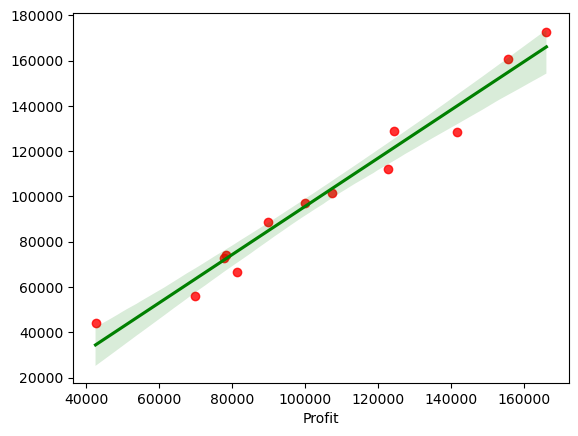

In [122]:
sns.regplot(data=df,x=y_test,y=ypred,scatter_kws={'color':'red'},line_kws={'color':'green'})

In [125]:
print(f"The mode coeffecient is {coef}")
print(f"The r^2 value is {r2score}")
print(f"The model score is {model_score}")
print(f"The ypredict values are {ypred}")

The mode coeffecient is [ 8.13064570e-01 -1.64177463e-02  3.56778474e-02 -1.02879590e+03]
The r^2 value is 0.9456301840625604
The model score is 0.9456301840625604
The ypredict values are [112174.3975986   44264.14406629  74085.39440641  97217.06548444
  66405.06355918 128599.46223023  56213.56919142  88506.89582164
  72614.69894842 101695.19443723 160565.4931819  128704.33056253
 172564.85038785]
